# I. RECUP DES DONNEES/PRISE EN MAIN

Installer les packages/librairies/extensions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import sklearn
from sklearn.cluster import KMeans
import seaborn as sns
import os
from os import listdir
import missingno as msno
from zipfile import ZipFile
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

Lister tous les fichiers zip presents dans le repertoire de travail => plus facile pour appeler les fichiers.

In [2]:
def zip_file(path_to_dir=os.path.abspath(os.getcwd()), suffix=".zip"):
    filenames = listdir(path_to_dir)
    return [filename for filename in filenames if filename.endswith(suffix)]

In [3]:
zip_file()

['concevez_une_application_au_service_de_la_santé_publique_Denis_Desoubzdanne.zip',
 'fr.openfoodfacts.org.products.csv.zip']

Ouvrir et fermer proprement un fichier zip 

In [4]:
file_name = zip_file()[0]
with ZipFile(file_name, 'r') as zip:
    zip.printdir()

File Name                                             Modified             Size
concevez_une_application_au_service_de_la_santé_publique_Denis_Desoubzdanne/Desoubzdanne_Denis_2_présentation_102022.pptx 2022-12-17 00:22:10      7392854
concevez_une_application_au_service_de_la_santé_publique_Denis_Desoubzdanne/Desoubzdanne_Denis_3_notebook_exploration_102022.ipynb 2022-12-17 00:28:46    107679304
concevez_une_application_au_service_de_la_santé_publique_Denis_Desoubzdanne/Desoubzdanne_Denis_3_notebook_nettoyage_102022.ipynb 2022-12-17 00:26:58       432710


Lister les fichiers csv

In [5]:
def csv_files(path_to_dir=os.path.abspath(os.getcwd()), suffix=".csv"):
    filenames = listdir(path_to_dir)
    return [filename for filename in filenames if filename.endswith(suffix)]

In [6]:
csv_files()

['df19b.csv',
 'df2_100.csv',
 'df2_20.csv',
 'foo.csv',
 'fr.csv',
 'fr.openfoodfacts.org.products.csv']

C'est le fichier 'fr.openfoodfacts.org.products.csv' qui nous intéresse.

df = pd.read_csv('fr.openfoodfacts.org.products.csv', 
                sep="\t", 
                header=None,
                encoding='UTF-8',
                low_memory=True)
#df.head(3)

Gérer le warning

In [7]:
l = [0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,41,42,46,47,48,49,
50,52,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,
83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,
104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,
120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,
137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,
154,155,156,157,158,159,160,161]

In [8]:
dico = {}
for elt in l:
    dico[elt]="str"

In [9]:
df = pd.read_csv(csv_files()[-1], 
                sep="\t", 
                header=None,
                low_memory=True, 
                dtype=dico)

In [10]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [11]:
df.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
1,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14,14,NaN,NaN
3,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN


Taille du df

In [12]:
df.shape

(320772, 162)

# 2 col semblent intéressantes (catégorielles)

In [13]:
df['pnns_groups_1'].unique()

array([nan, 'unknown', 'Fruits and vegetables', 'Sugary snacks',
       'Cereals and potatoes', 'Composite foods', 'Fish Meat Eggs',
       'Beverages', 'Fat and sauces', 'fruits-and-vegetables',
       'Milk and dairy products', 'Salty snacks', 'sugary-snacks',
       'cereals-and-potatoes', 'salty-snacks'], dtype=object)

In [14]:
df['pnns_groups_2'].nunique()

42

# Les colonnes pnns_groups_1 et _2 semblent importantes pour classer les produits selon des catégories. Je vais retenir pnns_groups_1 principalement (moins de gpes).

Création d'un fct missing() permettant de générer et d'enregistrer une fig missingno pour un df donné.

In [15]:
def missing(table=df, name_table='df'):
    %matplotlib inline
    fig = msno.matrix(table, labels=True)
    fig_copy = fig.get_figure()
    fig_copy.savefig(f'missingno_{name_table}.png', bbox_inches = 'tight')
    return fig

In [16]:
#missing()

Création d'une fct describ() pour visualiser le descriptif d'un df.

In [17]:
def describ(table=df):
    pd.set_option("max_rows", None)
    pd.set_option("max_columns", None)
    return table.describe().T #avoir un apperçu du jeu de données et des colonnes vides => supprimer ces dernières par la suite.

In [18]:
describ().head(5)

,count,unique,top,freq
0,,,,
code,320749,320749,0000000003087,1
url,320749,320749,http://world-fr.openfoodfacts.org/produit/0000...,1
creator,320770,3535,usda-ndb-import,169868
created_t,320769,189567,1489077120,20
created_datetime,320763,189568,2017-03-09T10:37:09Z,20


Verif si des lignes dupliquées (ce n'est pas le cas)

In [19]:
df.duplicated().describe().T

count     320772
unique         1
top        False
freq      320772
dtype: object

# II. NETTOYAGE DES DONNEES

Récup des col vides et les supprimer => df2.

In [20]:
def col_vides(table=df):
    df2 = table.describe().T
    df3 = df2[df2['count']==0]
    return list(df3.index.values)

In [21]:
df2 = df.drop(col_vides(), axis=1)

In [22]:
df2.shape #16 col sup

(320772, 146)

Vérif nature des col. => que des col "object" (pas de données numériques pour l'instant).

In [23]:
#df2.dtypes

# Vérification "à la main" (viz sous Excel) des col que je souhaite supprimer (celles qui ne me semblent pas utiles pour mon appli). <br>
J'ai retenu 98 col à supprimer.

In [24]:
to_remove = ['url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'generic_name',
 'packaging',
 'brands',
 'categories',
 'categories_tags',
 'origins',
 'manufacturing_places',
 'labels',
 'labels_tags',
 'emb_codes',
 'cities',
 'countries',
 'countries_tags',
 'traces_tags',
 'traces_fr',
 'additives_tags',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'states',
 'states_tags',
 'states_fr',
 'main_category',
 'image_small_url',
 'caprylic-acid_100g',
 'capric-acid_100g',
 'lauric-acid_100g',
 'myristic-acid_100g',
 'palmitic-acid_100g',
 'stearic-acid_100g',
 'arachidic-acid_100g',
 'behenic-acid_100g',
 'montanic-acid_100g',
 'omega-3-fat_100g',
 'alpha-linolenic-acid_100g',
 'eicosapentaenoic-acid_100g',
 'docosahexaenoic-acid_100g',
 'omega-6-fat_100g',
 'linoleic-acid_100g',
 'arachidonic-acid_100g',
 'gamma-linolenic-acid_100g',
 'dihomo-gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 'oleic-acid_100g',
 'gondoic-acid_100g',
 'trans-fat_100g',
 'sucrose_100g',
 'glucose_100g',
 'fructose_100g',
 'lactose_100g',
 'maltose_100g',
 'maltodextrins_100g',
 'starch_100g',
 'polyols_100g',
 'casein_100g',
 'serum-proteins_100g',
 'nucleotides_100g',
 'sodium_100g',
 'alcohol_100g',
 'beta-carotene_100g',
 'vitamin-d_100g',
 'vitamin-e_100g',
 'vitamin-k_100g',
 'vitamin-b1_100g',
 'vitamin-b2_100g',
 'vitamin-pp_100g',
 'vitamin-b6_100g',
 'vitamin-b9_100g',
 'folates_100g',
 'vitamin-b12_100g',
 'biotin_100g',
 'pantothenic-acid_100g',
 'silica_100g',
 'bicarbonate_100g',
 'potassium_100g',
 'chloride_100g',
 'phosphorus_100g',
 'magnesium_100g',
 'zinc_100g',
 'copper_100g',
 'manganese_100g',
 'fluoride_100g',
 'selenium_100g',
 'chromium_100g',
 'molybdenum_100g',
 'iodine_100g',
 'caffeine_100g',
 'taurine_100g',
 'ph_100g',
 'fruits-vegetables-nuts_100g',
 'collagen-meat-protein-ratio_100g',
 'cocoa_100g',
 'nutrition-score-uk_100g']

df2 devient df3 après 2e sppression de col.

In [25]:
df3 = df2.drop(columns=to_remove)

In [26]:
df3.shape

(320772, 48)

# déterminer le nb de NaN par colonne <br>(taux de non-remplissage en %) <br>
Création de df4 en triant le % ds chq col par ordre décroissant.

In [27]:
d = {}
for elt in list(df3.columns):
    d[elt] = round(df3[elt].isna().sum()/len(df3)*100, 4)
df4 = pd.DataFrame(d.items(), columns=['Index', '%NaN']).sort_values(by='%NaN', ascending=False)
df4.head(10)

,Index,%NaN
17,allergens_fr,99.9941
46,carbon-footprint_100g,99.9165
31,energy-from-fat_100g,99.7328
23,ingredients_from_palm_oil_tags,98.4927
24,ingredients_that_may_be_from_palm_oil_tags,96.3538
10,first_packaging_code_geo,94.1382
11,cities_tags,93.6653
6,origins_tags,93.0938
34,monounsaturated-fat_100g,92.8850
35,polyunsaturated-fat_100g,92.8738


In [28]:
df3['carbon-footprint_100g'].isna().sum() #verif pour le 2e

320504

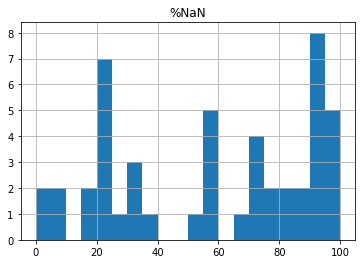

In [29]:
hist = df4.hist(bins=20) #hist pour vérifier la distribution des %NaN de chq colonne.

# /!\ ATTENTION!! J'observe une "cassure" à env 60%. Je fixe donc un cut-off à 60% (col supprimées). <br> Mais il y a qq même des col que je souhaite garder malgré tout!

In [30]:
def to_remove(cut=60):
    df = df4[df4['%NaN'] >= cut]
    return list(df['Index'])


l2 = to_remove()

# /!\ UN CHOIX DOIT ETRE FAIT SUR CE QUI ME SEMBLE IMPORTANT POUR LA SUITE. MALGRE LE CUT-OFF DE 60%, JE SOUHAITE CONSERVER DES COL QUI ME PARAISSENT IMPORTANTES POUR LA SUITE (l_tokeep).

In [31]:
l_tokeep = ['carbon-footprint_100g', 'ingredients_from_palm_oil_tags', 
            'cities_tags', 'origins_tags', 'monounsaturated-fat_100g', 
            'polyunsaturated-fat_100g', 'traces', 'allergens', 
            'emb_codes_tags', 'manufacturing_places_tags',
            'labels_fr', 'categories_fr','pnns_groups_1','pnns_groups_2']

In [32]:
for elt in l_tokeep:
    l2.remove(elt)
l2

['allergens_fr',
 'energy-from-fat_100g',
 'ingredients_that_may_be_from_palm_oil_tags',
 'first_packaging_code_geo',
 'stores',
 'purchase_places',
 'image_url',
 'packaging_tags',
 'main_category_fr',
 'quantity']

df3 devient df5 après sup des col de l2.

In [33]:
df5 = df3.drop(columns=l2)

In [34]:
df5.shape

(320772, 38)

#Convertir les colonnes nécessaires en float ou int.

In [35]:
df5.columns[21:]

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g',
       'monounsaturated-fat_100g', 'polyunsaturated-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'carbon-footprint_100g',
       'nutrition-score-fr_100g'],
      dtype='object', name=0)

In [36]:
df5[list(df5.columns[21:])] = df5[list(df5.columns[21:])].apply(pd.to_numeric, errors='coerce', downcast='float')
df5[['additives_n']] = df5[['additives_n']].apply(pd.to_numeric, errors='coerce', downcast='integer')

In [37]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 1 to 320772
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   code                            320749 non-null  object 
 1   product_name                    303010 non-null  object 
 2   brands_tags                     292352 non-null  object 
 3   categories_fr                   84411 non-null   object 
 4   origins_tags                    22153 non-null   object 
 5   manufacturing_places_tags       36495 non-null   object 
 6   labels_fr                       46666 non-null   object 
 7   emb_codes_tags                  29303 non-null   object 
 8   cities_tags                     20320 non-null   object 
 9   countries_fr                    320492 non-null  object 
 10  ingredients_text                248962 non-null  object 
 11  allergens                       28344 non-null   object 
 12  traces          

#creation d'une fct pour rajouter une colonne 'Nb_NaN' comptant le nb de NaN dans chaque ligne <br> 
de la colonne "energy_100g" (index=21) jusqu'à la fin.

In [38]:
def NaN_rows(table=df5, col=21):
    dico = {}
    df = table.copy()
    for i in range(0,len(table)):
        dico[i]=df.iloc[i,col:].isna().sum()
    df2 = pd.DataFrame.from_dict(dico, orient='index', columns=['Nb_NaN'])
    df.insert(col, 'Nb_NaN', list(df2['Nb_NaN']))
    return df

In [39]:
df6 = NaN_rows() #un peu long 1min32

In [40]:
df6.head(3)

,code,product_name,brands_tags,categories_fr,origins_tags,manufacturing_places_tags,labels_fr,emb_codes_tags,cities_tags,countries_fr,ingredients_text,allergens,traces,serving_size,additives_n,additives,additives_fr,ingredients_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,Nb_NaN,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,carbon-footprint_100g,nutrition-score-fr_100g
1,0000000003087,Farine de blé noir,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000004530,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,d,NaN,NaN,3,2243.0,28.570000,28.57,NaN,NaN,0.018,64.290001,14.290000,3.6,3.570000,0.000,0.0,0.0214,0.000,0.00129,NaN,14.0
3,0000000004559,Peanuts,torn-glasser,NaN,NaN,NaN,NaN,NaN,NaN,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",NaN,NaN,28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,b,NaN,NaN,3,1941.0,17.860001,0.00,NaN,NaN,0.000,60.709999,17.860001,7.1,17.860001,0.635,0.0,0.0000,0.071,0.00129,NaN,0.0


# /!\ Je me fixe comme critère qu'il ne faut pas qu'il y ait plus de 13 (compris) <br>
# dans la liste des données quantitatives <br> (il faut que l'on ait au moins des données pour 'fat, carbohy, prot et sel').

In [41]:
df7 = df6[df6['Nb_NaN']<13]

In [42]:
df7.shape

(257076, 39)

In [43]:
print(f'Il y a {len(df5)-len(df7)} produits avec plus de 13 NaN à partir de la colonne "energy_100g" qui ont été supprimées pour former le df7.')

Il y a 63696 produits avec plus de 13 NaN à partir de la colonne "energy_100g" qui ont été supprimées pour former le df7.


In [44]:
describ(df7)

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
additives_n,231151.0,2.004625,2.518632,0.000000,0.000000,1.000000,3.000000,3.100000e+01
Nb_NaN,257076.0,5.749280,3.281505,1.000000,3.000000,3.000000,9.000000,1.200000e+01
energy_100g,256662.0,1144.577393,6501.150879,0.000000,377.000000,1105.000000,1674.000000,3.251373e+06
fat_100g,239498.0,12.714128,17.552208,0.000000,0.000000,5.000000,20.000000,7.142900e+02
saturated-fat_100g,229454.0,5.127654,8.002268,0.000000,0.000000,1.790000,7.140000,5.500000e+02
monounsaturated-fat_100g,22821.0,10.422968,17.072582,0.000000,0.000000,4.000000,10.710000,5.571400e+02
polyunsaturated-fat_100g,22857.0,6.310235,10.826531,0.000000,0.000000,2.220000,7.140000,9.800000e+01
cholesterol_100g,144082.0,0.020064,0.357997,0.000000,0.000000,0.000000,0.020000,9.523800e+01
carbohydrates_100g,239449.0,32.166660,29.734013,0.000000,6.020000,21.000000,58.500000,2.916670e+03


# III. GESTION DES DONNEES ABERRANTES.

Création de df8 qui regroupe que les data numériques de df7.

In [45]:
df8 = df7.iloc[:,22:]

Val neg : qq unes et bcp pour nutri_score (normal car scale de -15 à 40).

In [46]:
df8.where(df8 < 0).count()

0
energy_100g                     0
fat_100g                        0
saturated-fat_100g              0
monounsaturated-fat_100g        0
polyunsaturated-fat_100g        0
cholesterol_100g                0
carbohydrates_100g              0
sugars_100g                     7
fiber_100g                      1
proteins_100g                   3
salt_100g                       0
vitamin-a_100g                  1
vitamin-c_100g                  1
calcium_100g                    0
iron_100g                       1
carbon-footprint_100g           0
nutrition-score-fr_100g     35699
dtype: int64

Val sup 100 : bcp et énormément pour energy_100g (normal car pas limité à 100g mais en kj/100g).

In [47]:
df8.where(df8 > 100).count()

0
energy_100g                 238951
fat_100g                         4
saturated-fat_100g               3
monounsaturated-fat_100g         1
polyunsaturated-fat_100g         0
cholesterol_100g                 0
carbohydrates_100g              17
sugars_100g                     11
fiber_100g                       4
proteins_100g                    1
salt_100g                      151
vitamin-a_100g                   0
vitamin-c_100g                   3
calcium_100g                    10
iron_100g                        0
carbon-footprint_100g          175
nutrition-score-fr_100g          0
dtype: int64

Création d'une fct pr remplacer les val neg par 0.

In [48]:
def replace_Neg():
    df = df7.copy()
    for elt in df.columns[29:-2]:
        df[elt] = df[elt].apply(lambda x : x if x > 0 else 0)
    return df

In [49]:
df9 = replace_Neg()

Vérif => ok

In [50]:
df9[(df9['sugars_100g'] < 0) | 
           (df9['fiber_100g'] < 0) |
           (df9['proteins_100g'] < 0) |
           (df9['vitamin-a_100g'] < 0) |
           (df9['vitamin-c_100g'] < 0) |
           (df9['iron_100g'] < 0)]

,code,product_name,brands_tags,categories_fr,origins_tags,manufacturing_places_tags,labels_fr,emb_codes_tags,cities_tags,countries_fr,ingredients_text,allergens,traces,serving_size,additives_n,additives,additives_fr,ingredients_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,Nb_NaN,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,carbon-footprint_100g,nutrition-score-fr_100g


Je supprime toutes les valeurs trop grandes (>110 g) et les energy_100g > 4000 kJ/100g (max pour les lipides : energy inf à 4000 kj/100g, source : https://en.wikipedia.org/wiki/Food_energy). <br>
#Cut-off à 110 g correspond à 10% d'erreur de mesure. 

In [51]:
def delete_higherVal():
    df = df9.copy()
    df.drop(df[df['energy_100g'] > 4000].index, inplace=True)
    for elt in df9.columns[23:-2]:
        df.drop(df[df[elt] > 110].index, inplace=True)
    return df

In [52]:
df10 = delete_higherVal()

In [53]:
df10.shape

(256843, 39)

In [54]:
df9.shape

(257076, 39)

In [55]:
def val_sup(table=df10, val=100, debut=22, fin=-2):
    df = table.copy()
    df2 = df.iloc[:,debut:fin]
    return df2.where(df2 > val).count()

In [56]:
val_sup()

0
energy_100g                 238743
fat_100g                         2
saturated-fat_100g               0
monounsaturated-fat_100g         0
polyunsaturated-fat_100g         0
cholesterol_100g                 0
carbohydrates_100g               9
sugars_100g                      7
fiber_100g                       0
proteins_100g                    0
salt_100g                       90
vitamin-a_100g                   0
vitamin-c_100g                   0
calcium_100g                     0
iron_100g                        0
dtype: int64

Remplacer toutes les val comprises entre 100 et 110 (sauf energy_100g) par 100.

In [57]:
def replace_Pos():
    df = df10.copy()
    for elt in df.columns[23:-2]:
        ind = df[elt].isna() #rajout de code par Vincent (mentor) => sinon toutes les valeurs NaN sont remplacées par 100!
        df[elt] = df[elt].apply(lambda x : x if x <= 100 else 100)
        df.loc[ind,elt] = np.nan #suite code Vincent
    return df

In [58]:
df11 = replace_Pos()

In [59]:
val_sup(table=df11, val=100, debut=22, fin=-2)

0
energy_100g                 238743
fat_100g                         0
saturated-fat_100g               0
monounsaturated-fat_100g         0
polyunsaturated-fat_100g         0
cholesterol_100g                 0
carbohydrates_100g               0
sugars_100g                      0
fiber_100g                       0
proteins_100g                    0
salt_100g                        0
vitamin-a_100g                   0
vitamin-c_100g                   0
calcium_100g                     0
iron_100g                        0
dtype: int64

Ok, c'est bon!

Appliquer un dernier filtre : supprimer les lignes quand somme(fat+prot+carbo+salt+fiber)>100g<br>
ou quand somme des lipides > fat ou quand sugars > carbohydrates.

In [60]:
df11b = df11['fat_100g']+df11['carbohydrates_100g']+df11['proteins_100g']+df11['fiber_100g']+df11['salt_100g']
describ(df11b)

count    238792.000000
mean         55.635817
std          35.443826
min           0.000000
25%          21.778000
50%          53.330002
75%          92.100000
max         238.703995
dtype: float64

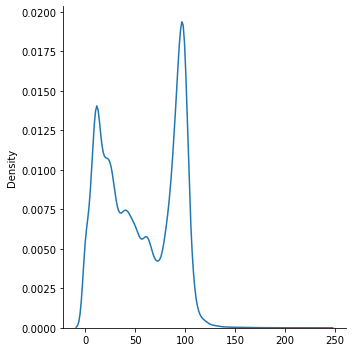

In [61]:
sns.displot(x=df11b,kind='kde')

In [62]:
def delete_illogics(table=df11):
    df=table.copy()
    df.drop(df[df['fat_100g']+
               df['carbohydrates_100g']+
               df['proteins_100g']+
               df['fiber_100g']+
               df['salt_100g']
            > 100].index, 
            inplace=True
           )
    df.drop(df[df['saturated-fat_100g']+
                df['monounsaturated-fat_100g']+
                df['polyunsaturated-fat_100g']+
                df['cholesterol_100g']
                > df['fat_100g']].index,
                inplace=True
               )
    df.drop(df[df['sugars_100g'] > df['carbohydrates_100g']].index, inplace=True)
    return df

In [63]:
df12 = delete_illogics()

In [64]:
df12.shape

(232068, 39)

In [65]:
df11.shape

(256843, 39)

Vérif => ok

In [66]:
val_sup(table=df12, val=100, debut=22, fin=-2)

0
energy_100g                 214187
fat_100g                         0
saturated-fat_100g               0
monounsaturated-fat_100g         0
polyunsaturated-fat_100g         0
cholesterol_100g                 0
carbohydrates_100g               0
sugars_100g                      0
fiber_100g                       0
proteins_100g                    0
salt_100g                        0
vitamin-a_100g                   0
vitamin-c_100g                   0
calcium_100g                     0
iron_100g                        0
dtype: int64

In [67]:
describ(df12)

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
additives_n,206418.0,2.088282,2.567496,0.0,0.000000,1.000000,3.000000,31.000000
Nb_NaN,232068.0,6.028651,3.261565,1.0,3.000000,6.000000,9.000000,12.000000
energy_100g,231684.0,1033.919434,759.209106,0.0,335.000000,992.000000,1569.000000,4000.000000
fat_100g,214563.0,11.012027,16.292376,0.0,0.000000,3.570000,16.809999,100.000000
saturated-fat_100g,205168.0,4.794635,7.677039,0.0,0.000000,1.500000,6.820000,100.000000
monounsaturated-fat_100g,15689.0,9.608193,17.735282,0.0,0.000000,2.500000,8.930000,85.709999
polyunsaturated-fat_100g,15715.0,5.118614,10.439366,0.0,0.000000,1.470000,5.000000,98.000000
cholesterol_100g,120972.0,0.022151,0.346832,0.0,0.000000,0.000000,0.028000,95.237999
carbohydrates_100g,214513.0,29.899991,28.753184,0.0,5.070000,17.000000,55.000000,100.000000


Nb : trop de données manquantes pour mono, polyunsat_100g, cholest et carbon-foot_100g.
La col Nb_Nan n'est plus utile : supprimée.
Ces colonnes sont supprimées.

In [68]:
l3 = ['Nb_NaN', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'carbon-footprint_100g', 'cholesterol_100g']

In [69]:
df13 = df12.drop(columns=l3)

In [70]:
describ(df13) #ok col supprimées.

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
additives_n,206418.0,2.088282,2.567496,0.0,0.00,1.00000,3.000000,31.000000
energy_100g,231684.0,1033.919434,759.209106,0.0,335.00,992.00000,1569.000000,4000.000000
fat_100g,214563.0,11.012027,16.292376,0.0,0.00,3.57000,16.809999,100.000000
carbohydrates_100g,214513.0,29.899991,28.753184,0.0,5.07,17.00000,55.000000,100.000000
sugars_100g,232068.0,14.721461,20.748930,0.0,0.78,4.70000,20.930000,100.000000
fiber_100g,232068.0,1.633268,3.119173,0.0,0.00,0.00000,2.400000,100.000000
proteins_100g,232068.0,6.558260,7.851636,0.0,0.42,4.00000,9.330000,100.000000
salt_100g,232068.0,1.608926,6.573712,0.0,0.05,0.54356,1.361440,100.000000
vitamin-a_100g,232068.0,0.000221,0.056416,0.0,0.00,0.00000,0.000000,26.700001


# IV. Imputation

IV.1 STEP 1 : fillna col 'additives_n'

In [71]:
df14 = df13.copy()
df14['additives_n'] = df13['additives_n'].fillna(0)

In [72]:
describ(df14).head(2)

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
additives_n,232068.0,1.857469,2.508418,0.0,0.0,1.0,3.0,31.0
energy_100g,231684.0,1033.919434,759.209106,0.0,335.0,992.0,1569.0,4000.0


<AxesSubplot:>

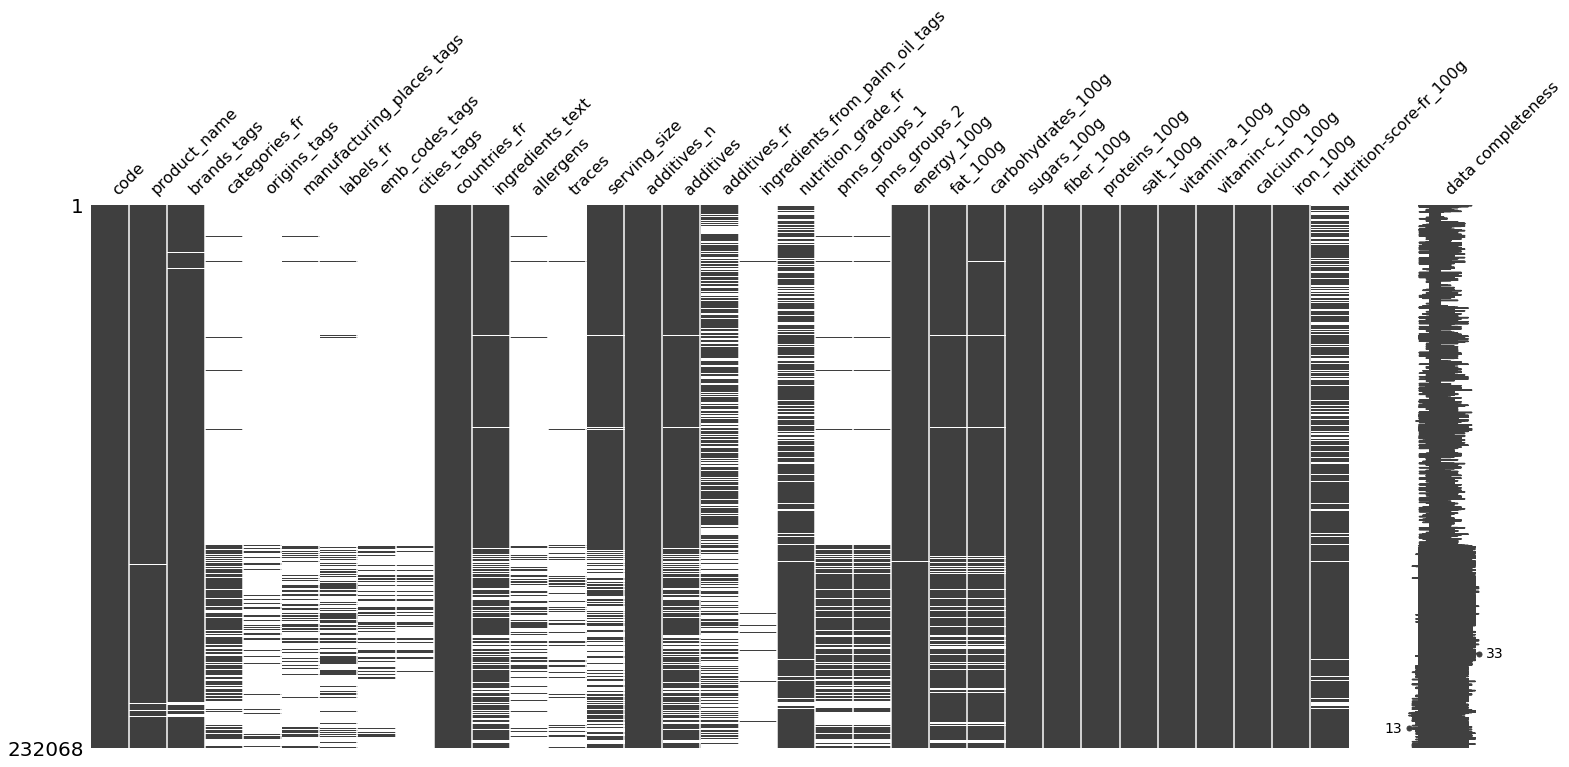

In [73]:
missing(df14, 'df14')

In [74]:
df14.iloc[:, 21:].isna().sum()

0
energy_100g                  384
fat_100g                   17505
carbohydrates_100g         17555
sugars_100g                    0
fiber_100g                     0
proteins_100g                  0
salt_100g                      0
vitamin-a_100g                 0
vitamin-c_100g                 0
calcium_100g                   0
iron_100g                      0
nutrition-score-fr_100g    34545
dtype: int64

Utiliser la méthode des KNN pour remplir les NaN dans les colonnes : <br> 
- energy_100g et nutrition_score,
- saturated-fat et carbohydrates_100g.

In [75]:
l4 = list(df14.columns)[0:21]

On garde que les col de données numériques sans les col trop vides.

In [76]:
df15 = df14.drop(columns=l4)

In [77]:
df15.head(3)

,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
5,1552.0,1.43,77.139999,0.0,5.7,8.57,0.0,0.0,0.0000,0.000,0.0000,NaN
7,1490.0,NaN,80.000000,0.0,0.0,8.89,0.0,0.0,0.0027,0.044,0.0000,NaN
11,1393.0,1.04,62.500000,0.0,12.5,22.92,0.0,0.0,0.0000,0.062,0.0045,NaN


Préparer le tableau en minmaxscaler.

In [78]:
scaler = MinMaxScaler()
df16 = pd.DataFrame(scaler.fit_transform(df15), columns = df15.columns, index=df15.index)
df16.head(3)

,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
5,0.38800,0.0143,0.7714,0.0,0.057,0.0857,0.0,0.0,0.000000,0.000000,0.00000,NaN
7,0.37250,NaN,0.8000,0.0,0.000,0.0889,0.0,0.0,0.000054,0.000444,0.00000,NaN
11,0.34825,0.0104,0.6250,0.0,0.125,0.2292,0.0,0.0,0.000000,0.000626,0.00009,NaN


# /!\ Script à relancer pour KNN (faire passer la ligne en code).

imputer = KNNImputer(n_neighbors=5)
df17 = pd.DataFrame(imputer.fit_transform(df16),columns = df16.columns, index=df16.index)
df17.head(3) #très long : 15min16s

Sauver en xlsx pour éviter de relancer le KNN.

df17.to_excel('df17.xlsx')

In [79]:
df18 = pd.read_excel('df17.xlsx', header=0, index_col=0) #30 s d'execution

In [80]:
df18.head(3)

,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
5,0.38800,0.01430,0.7714,0.0,0.057,0.0857,0.0,0.0,0.000000,0.000000,0.00000,0.170909
7,0.37250,0.00404,0.8000,0.0,0.000,0.0889,0.0,0.0,0.000054,0.000444,0.00000,0.254545
11,0.34825,0.01040,0.6250,0.0,0.125,0.2292,0.0,0.0,0.000000,0.000626,0.00009,0.163636


Ok, KNN a bien marché!

In [81]:
df18.isna().sum()

energy_100g                0
fat_100g                   0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
vitamin-a_100g             0
vitamin-c_100g             0
calcium_100g               0
iron_100g                  0
nutrition-score-fr_100g    0
dtype: int64

In [82]:
describ(df18)

,count,mean,std,min,25%,50%,75%,max
energy_100g,232068.0,0.258407,0.189812,0.0,0.083750,0.248000,0.392250,1.0
fat_100g,232068.0,0.110805,0.161316,0.0,0.000000,0.038500,0.170000,1.0
carbohydrates_100g,232068.0,0.299313,0.286161,0.0,0.052600,0.171900,0.550000,1.0
sugars_100g,232068.0,0.147215,0.207489,0.0,0.007800,0.047000,0.209300,1.0
fiber_100g,232068.0,0.016333,0.031192,0.0,0.000000,0.000000,0.024000,1.0
proteins_100g,232068.0,0.065583,0.078516,0.0,0.004200,0.040000,0.093300,1.0
salt_100g,232068.0,0.016089,0.065737,0.0,0.000500,0.005436,0.013614,1.0
vitamin-a_100g,232068.0,0.000008,0.002113,0.0,0.000000,0.000000,0.000000,1.0
vitamin-c_100g,232068.0,0.000135,0.004271,0.0,0.000000,0.000000,0.000000,1.0
calcium_100g,232068.0,0.000533,0.004573,0.0,0.000000,0.000000,0.000354,1.0


On reforme le df d'origine avec toutes les col remplies.

In [83]:
df19 = pd.DataFrame(scaler.inverse_transform(df18),columns = df18.columns, index=df18.index)
df20 = pd.merge(df14.iloc[:,0:21], df19, left_index=True, right_index=True)

In [84]:
df20.head(3)

,code,product_name,brands_tags,categories_fr,origins_tags,manufacturing_places_tags,labels_fr,emb_codes_tags,cities_tags,countries_fr,ingredients_text,allergens,traces,serving_size,additives_n,additives,additives_fr,ingredients_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
5,0000000016094,Organic Polenta,bob-s-red-mill,NaN,NaN,NaN,NaN,NaN,NaN,États-Unis,Organic polenta,NaN,NaN,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,NaN,NaN,NaN,NaN,1552.0,1.430,77.139999,0.0,5.7,8.57,0.0,0.0,0.0000,0.000,0.0000,-5.6
7,0000000016117,Organic Long Grain White Rice,lundberg,NaN,NaN,NaN,NaN,NaN,NaN,États-Unis,Organic long grain white rice,NaN,NaN,45 g (0.25 cup),0.0,[ organic-long-grain-white-rice -> en:organic...,NaN,NaN,NaN,NaN,NaN,1490.0,0.404,80.000000,0.0,0.0,8.89,0.0,0.0,0.0027,0.044,0.0000,-1.0
11,0000000016612,Organic Adzuki Beans,unfi,NaN,NaN,NaN,NaN,NaN,NaN,États-Unis,Organic adzuki beans,NaN,NaN,48 g (0.25 cup),0.0,[ organic-adzuki-beans -> en:organic-adzuki-b...,NaN,NaN,NaN,NaN,NaN,1393.0,1.040,62.500000,0.0,12.5,22.92,0.0,0.0,0.0000,0.062,0.0045,-6.0


<AxesSubplot:>

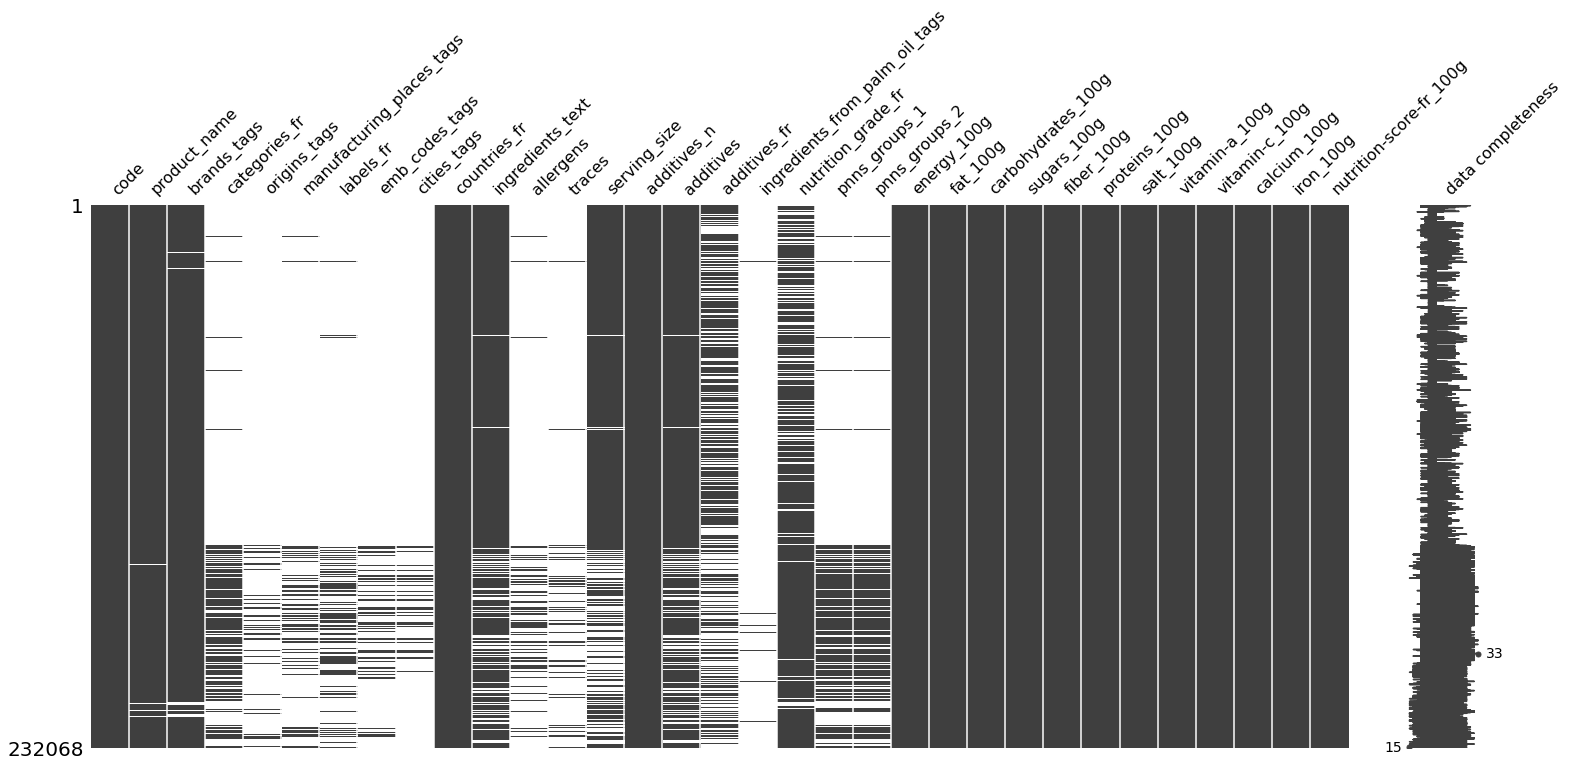

In [85]:
missing(df20, 'df20')

Vérifications sur site internet du KNN (energy_100g seulement).

In [86]:
df14[df14['energy_100g'].isna()==True]['code'].sample(n=10, random_state=42)

172979    0895296002032
160579    0853152100025
299714    7640155340038
285596    7441000708511
66976     0061104149422
316509    8809061676429
43206     0041303001660
111219      01121302231
316936    8850987123641
150291    0812828012017
Name: code, dtype: object

In [87]:
df20.at[150291, 'energy_100g']

1266.8

#vérification sur le site pour ENERGY_100g : (par ID) <br>
#172979 => sur-évalué (3615 au lieu de 1979 sur site). <br>
#160579 => pas mal un peu en-dessous (1207 au lieu de 1774 sur site). <br>
#299714 => sur-évalué (2179 au lieu de 1653 sur site). <br>
#285596 => sur-évalué (384 au lieu de 63 sur site). <br>
#66976  => bien (1328 au lieu de 1494 sur site). <br>
#316509 => abs (798 au lieu de rien sur site). <br>
#43206  => très sous-évalué (185 au lieu de 1569 sur site). <br>
#111219 => abs (228 au lieu de rien sur site). <br>
#316936 => sur-évalué (771 au lieu de 251 sur site). <br>
#150291 => abs (1267 au lieu de rien sur site). <br>

Nb : imputation pas top pour la col energy_100g.

# Imputation de la colonne pnns_groups_1

In [88]:
df20['pnns_groups_1'] = df20['pnns_groups_1'].fillna('unknown')
df20['pnns_groups_1'] = df20['pnns_groups_1'].str.lower()
df20['pnns_groups_1'] = df20['pnns_groups_1'].str.replace(' ','-')

In [89]:
df20['pnns_groups_1'].unique()

array(['unknown', 'fruits-and-vegetables', 'sugary-snacks',
       'composite-foods', 'fish-meat-eggs', 'beverages',
       'cereals-and-potatoes', 'milk-and-dairy-products',
       'fat-and-sauces', 'salty-snacks'], dtype=object)

# Stocker/enregistrer le df20 pour le rappeler dans l'autre notebook.

In [90]:
df20.shape

(232068, 33)

In [91]:
%store df20

Stored 'df20' (DataFrame)


Dernière vérif

In [92]:
describ(df20)

,count,mean,std,min,25%,50%,75%,max
additives_n,232068.0,1.857469,2.508418,0.0,0.00,1.000000,3.00000,31.000000
energy_100g,232068.0,1033.629241,759.247026,0.0,335.00,992.000000,1569.00000,4000.000000
fat_100g,232068.0,11.080482,16.131552,0.0,0.00,3.850000,17.00000,100.000000
carbohydrates_100g,232068.0,29.931283,28.616087,0.0,5.26,17.190001,55.00000,100.000000
sugars_100g,232068.0,14.721461,20.748930,0.0,0.78,4.700000,20.93000,100.000000
fiber_100g,232068.0,1.633268,3.119173,0.0,0.00,0.000000,2.40000,100.000000
proteins_100g,232068.0,6.558260,7.851636,0.0,0.42,4.000000,9.33000,100.000000
salt_100g,232068.0,1.608926,6.573712,0.0,0.05,0.543560,1.36144,100.000000
vitamin-a_100g,232068.0,0.000221,0.056416,0.0,0.00,0.000000,0.00000,26.700001
vitamin-c_100g,232068.0,0.006728,0.213555,0.0,0.00,0.000000,0.00000,50.000000
